In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay

from math import fabs
from math import sqrt

from sklearn.metrics import accuracy_score
from sklearn.metrics import rand_score
from sklearn.metrics import make_scorer

from sklearn.datasets import load_wine

from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# DATA

In [2]:
data, target = load_wine(as_frame=True, return_X_y=True)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# NORMAL DISTRIBUTION


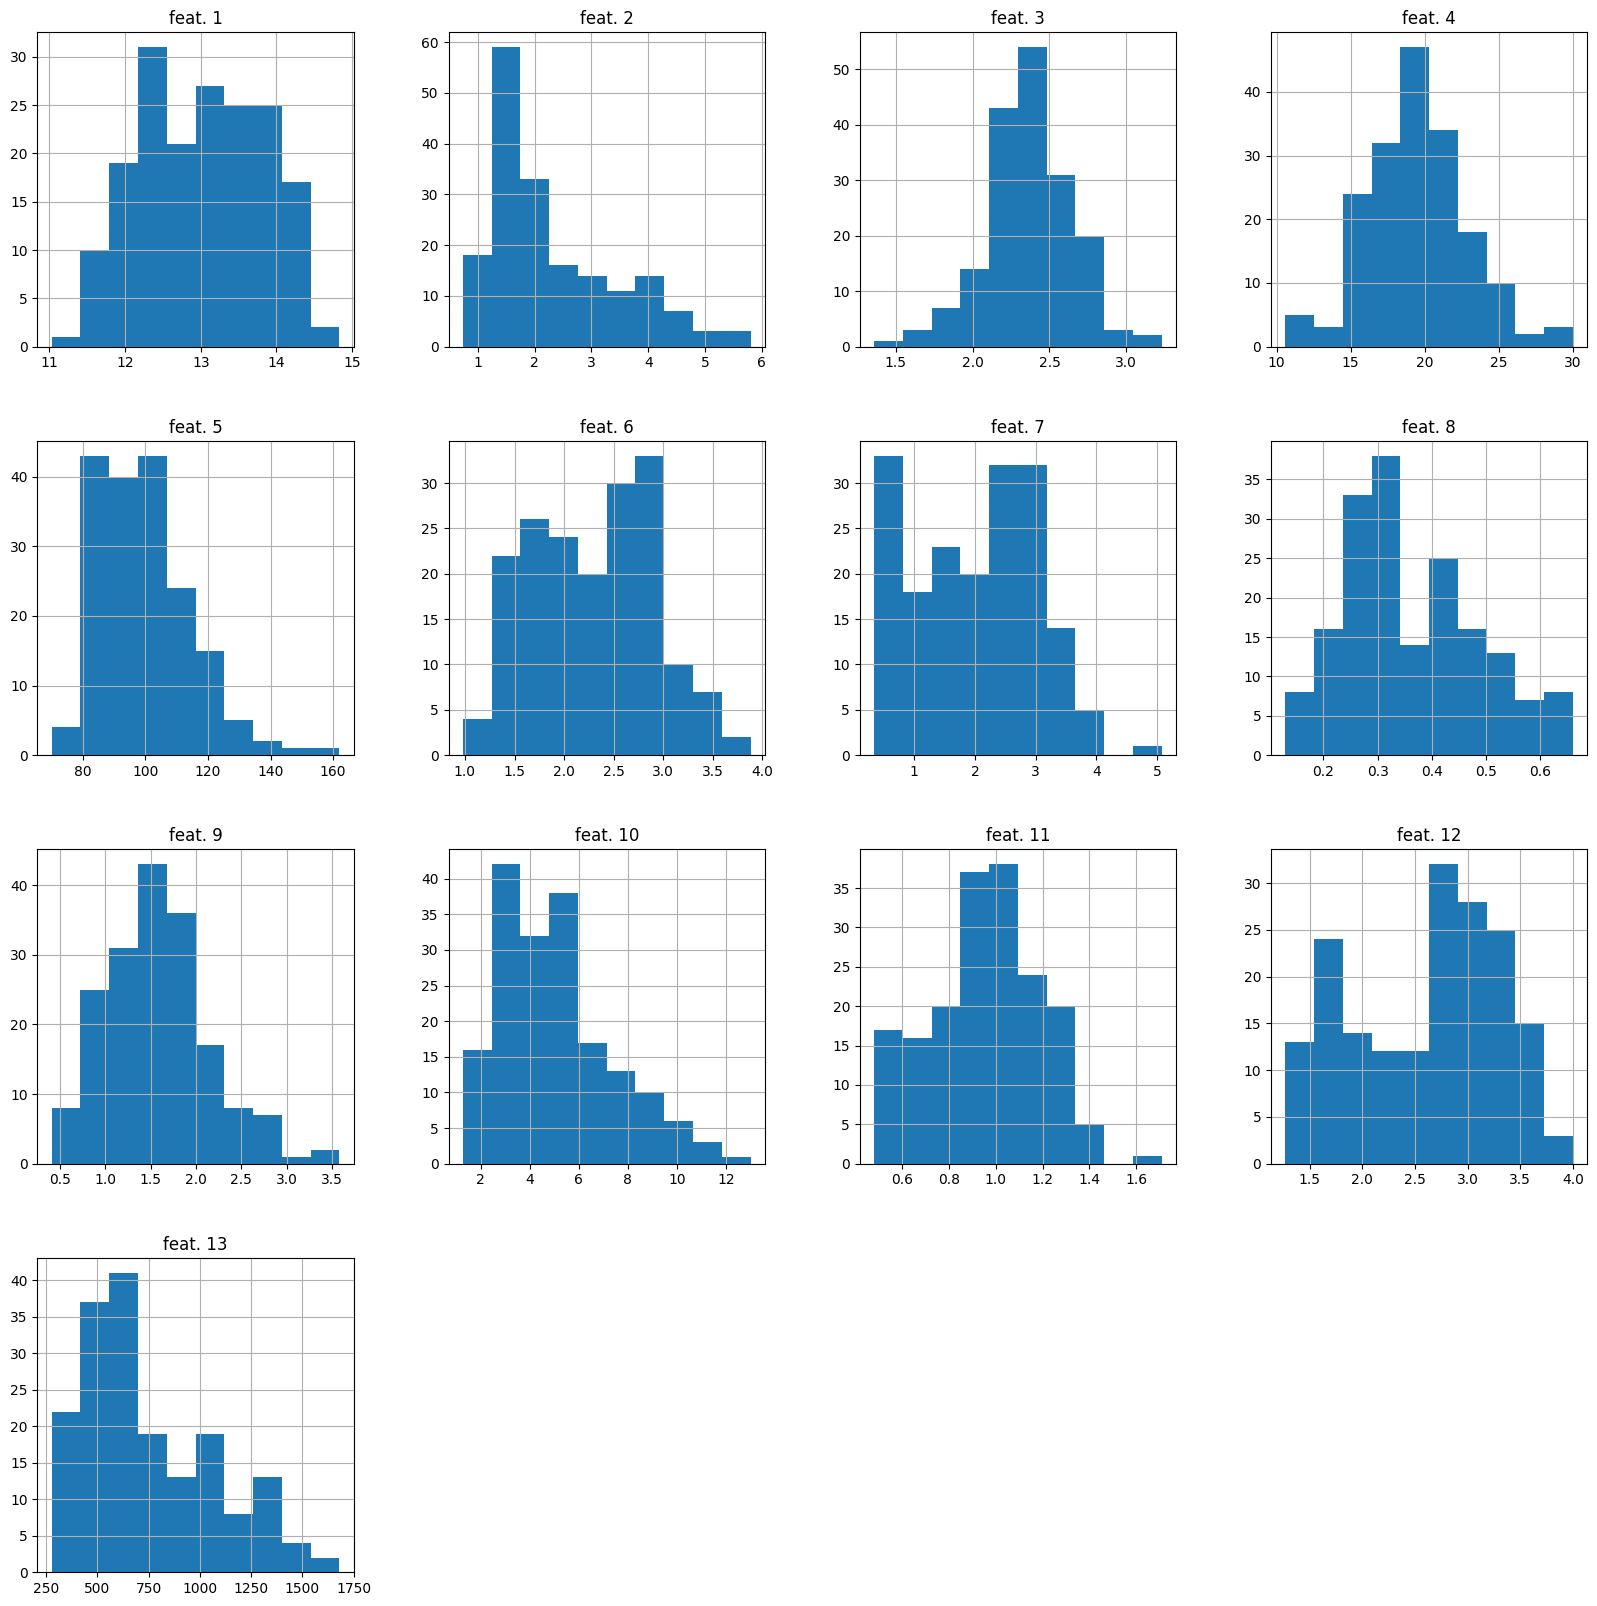

In [76]:
data.hist(bins=10, figsize=(20,20))
plt.show()

# DESCRIPTION


In [4]:
des = pd.DataFrame(data.describe())
#des.to_csv('description')
des

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# MODE

In [5]:
mode = pd.DataFrame(data.mode().head(1))
#mode.to_csv('mode')
mode

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.37,1.73,2.28,20.0,88.0,2.2,2.65,0.26,1.35,2.6,1.04,2.87,520.0


# MEAN ABSOLUTE DEVIATION

In [6]:
mad = pd.DataFrame((data - data.mean()).abs().mean()).transpose() #data.mad(){Deprecated since version 1.5.0: mad is deprecated.}
#mad.to_csv('mad')
mad

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.688462,0.920277,0.209208,2.595001,10.999243,0.536288,0.858878,0.104696,0.445893,1.835831,0.186851,0.611738,259.332344


# RANGE


In [7]:
max_val = pd.DataFrame(des.iloc[7]).transpose()
max_val

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
max,14.83,5.8,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.0,1.71,4.0,1680.0


In [8]:
min_val = pd.DataFrame(des.iloc[3]).transpose()
min_val

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
min,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0


In [9]:
min_max_vals = pd.concat([max_val, min_val])
range_ = pd.DataFrame(min_max_vals.iloc[0] - min_max_vals.iloc[1]).transpose()
#range_.to_csv('range')
range_

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,3.8,5.06,1.87,19.4,92.0,2.9,4.74,0.53,3.17,11.72,1.23,2.73,1402.0


# INTERQUEARTILE RANGE

In [10]:
first_qrt = pd.DataFrame(des.iloc[4]).transpose()
first_qrt

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25%,12.3625,1.6025,2.21,17.2,88.0,1.7425,1.205,0.27,1.25,3.22,0.7825,1.9375,500.5


In [11]:
third_qrt = pd.DataFrame(des.iloc[6]).transpose()
third_qrt

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
75%,13.6775,3.0825,2.5575,21.5,107.0,2.8,2.875,0.4375,1.95,6.2,1.12,3.17,985.0


In [12]:
first_third_qrt = pd.concat([third_qrt, first_qrt])
iqr = pd.DataFrame(first_third_qrt.iloc[0] - first_third_qrt.iloc[1]).transpose()
#iqr.to_csv('iqr')
iqr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.315,1.48,0.3475,4.3,19.0,1.0575,1.67,0.1675,0.7,2.98,0.3375,1.2325,484.5


# VARIANCE


In [13]:
var = pd.DataFrame(data.var()).transpose()
#var.to_csv('var')
var

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.659062,1.248015,0.075265,11.152686,203.989335,0.39169,0.997719,0.015489,0.327595,5.374449,0.052245,0.504086,99166.717355


In [14]:
pd.DataFrame(((data-data.mean())**2).mean()).transpose()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.65536,1.241004,0.074842,11.090031,202.843328,0.389489,0.992114,0.015402,0.325754,5.344256,0.051951,0.501254,98609.600966


In [15]:
# almost the same as data.var(), so it is alright

# OUTLIERS

## 3-SIGMA


In [16]:
def three_sigma(df):
    
    std = df.std()
    mean = df.mean()
    
    outliers = []
    
    for i in df.index:
        for ind, feat in enumerate(df.iloc[i]):
            if fabs(feat - mean[ind]) > 3*std[ind]:
                outliers.append(i)
                break
    return outliers

In [17]:
outliers_3_sigma = three_sigma(data)
outliers_3_sigma

[25, 59, 69, 73, 95, 110, 115, 121, 123, 158]

## HAMPEL


In [18]:
def hampel(df):
    med = df.median()
    mad = (df - df.mean()).abs().mean()
    
    outliers = []
    
    for i in df.index:
        for ind, feat in enumerate(df.iloc[i]):
            if fabs(feat - med[ind]) > 3*mad[ind]:
                outliers.append(i)
                break
    return outliers

In [19]:
outliers_hampel = hampel(data)
outliers_hampel

[1,
 3,
 10,
 13,
 14,
 18,
 25,
 31,
 33,
 50,
 59,
 66,
 69,
 73,
 76,
 78,
 95,
 96,
 100,
 105,
 110,
 115,
 121,
 123,
 124,
 127,
 136,
 137,
 143,
 146,
 151,
 153,
 155,
 158,
 159,
 166,
 167,
 173,
 175]

## QUARTILE

In [20]:
def quartile(df):
    
    
    des = pd.DataFrame(df.describe())
    first_qrt = pd.DataFrame(des.iloc[4]).transpose()
    third_qrt = pd.DataFrame(des.iloc[6]).transpose()
    iqr = first_third_qrt.iloc[0] - first_third_qrt.iloc[1]
    
    med = des.iloc[5]
    
    outliers = []
    
    for i in df.index:
        for ind, feat in enumerate(df.iloc[i]):
            if fabs(feat - med[ind]) > 2*iqr[ind]:
                outliers.append(i)
                break
    return outliers

In [21]:
outliers_quartiles = quartile(data)
outliers_quartiles

[14,
 18,
 25,
 59,
 69,
 73,
 95,
 110,
 115,
 121,
 123,
 127,
 137,
 143,
 146,
 151,
 155,
 158,
 159,
 166,
 173]

## k-NN

In [22]:
def NN_algorithm(df, k):
    
    neigh = NearestNeighbors(n_neighbors=k)
    neigh = neigh.fit(df)
    dist, indexes = neigh.kneighbors(n_neighbors=k, return_distance=True)
    
    result = pd.DataFrame(dist[:, k-1])
    result = result.sort_values(0, ascending=False)
    
    return result[0:10]

In [23]:
outliers_kNN = NN_algorithm(data, 5)
outliers_kNN.index

Int64Index([18, 31, 10, 14, 3, 5, 53, 95, 80, 2], dtype='int64')

In [24]:
true_indices_of_outliers = list(set(outliers_kNN.index) & set(outliers_hampel))
true_indices_of_outliers

[3, 10, 14, 18, 31, 95]

# CORRELATION

In [25]:
corr = data.corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot: >

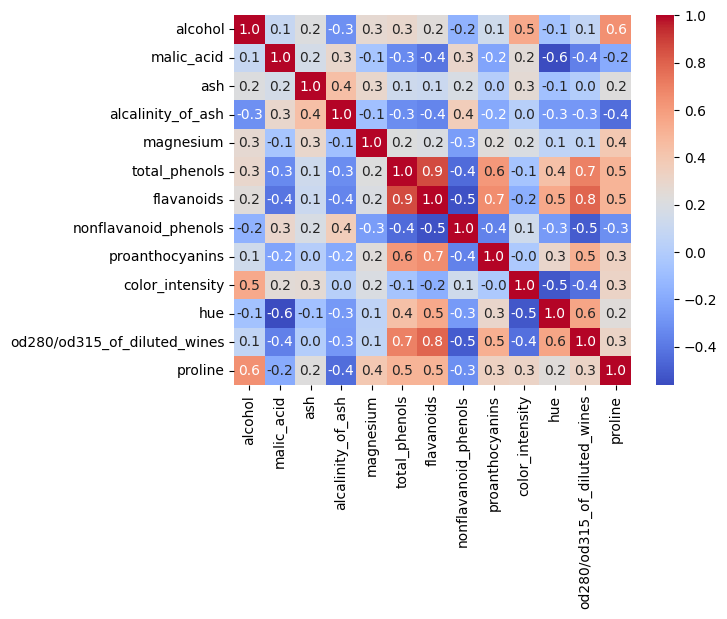

In [26]:
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')

## HIGH CORRELATION

In [27]:
high_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = high_corr.stack().reset_index()
high_corr.columns = ['feature1', 'feature2', 'correlation']
high_corr = high_corr.loc[high_corr['correlation'] > 0.7]
print(high_corr)

         feature1                      feature2  correlation
50  total_phenols                    flavanoids     0.864564
61     flavanoids  od280/od315_of_diluted_wines     0.787194


## LOW CORRELATION

In [28]:
low_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
low_corr = low_corr.stack().reset_index()
low_corr.columns = ['feature1', 'feature2', 'correlation']
low_corr = low_corr.loc[low_corr['correlation'] < -0.5]
print(low_corr)

                feature1                      feature2  correlation
20            malic_acid                           hue    -0.561296
57            flavanoids          nonflavanoid_phenols    -0.537900
66  nonflavanoid_phenols  od280/od315_of_diluted_wines    -0.503270
72       color_intensity                           hue    -0.521813


## CORRELATION WITH TARGET

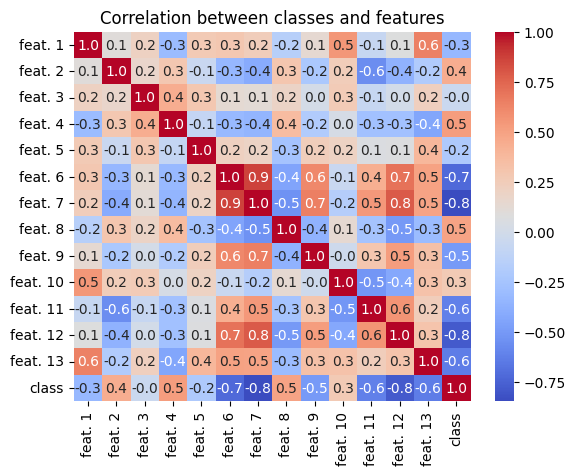

In [29]:
names_of_feat = [f'feat. {i}' for i in range(1,14)]
df = pd.DataFrame(data=data)
df.columns = names_of_feat
df = pd.concat([data, pd.Series(target, name='class')], axis=1)

corr = df.corr()

sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.1f')
plt.title("Correlation between classes and features")
plt.show()

In [30]:
print(corr['class'])

feat. 1    -0.328222
feat. 2     0.437776
feat. 3    -0.049643
feat. 4     0.517859
feat. 5    -0.209179
feat. 6    -0.719163
feat. 7    -0.847498
feat. 8     0.489109
feat. 9    -0.499130
feat. 10    0.265668
feat. 11   -0.617369
feat. 12   -0.788230
feat. 13   -0.633717
class       1.000000
Name: class, dtype: float64


# PCA


In [31]:
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data)

pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data)

In [32]:
outliers = [outliers_3_sigma, outliers_hampel, outliers_kNN.index, outliers_quartiles]
method = ['3-sigma', 'hampel', 'k-NN', 'quartiles']

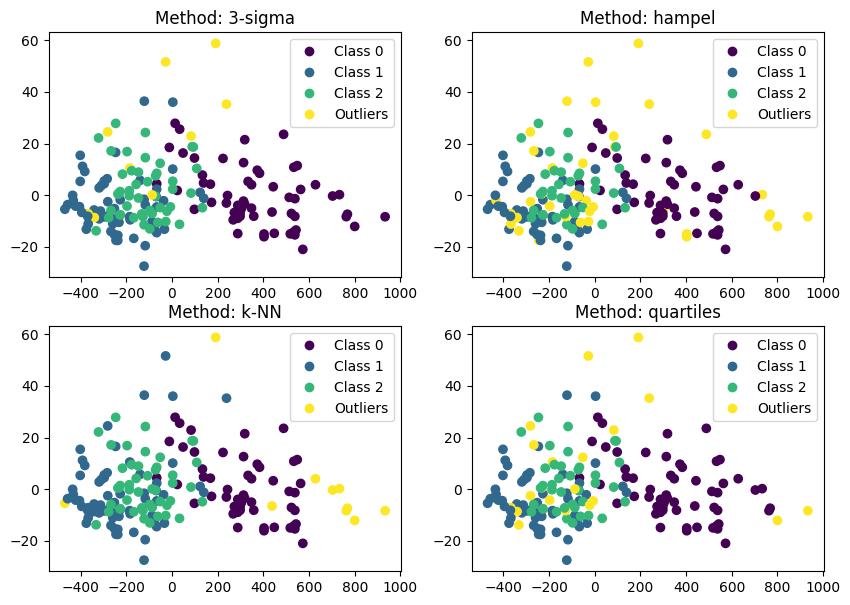

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7),)
axs = axs.ravel()

for ind, outlier in enumerate(outliers):
    c = np.array(target)
    c[outlier] = 3
    scatter = axs[ind].scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=c)
    axs[ind].set_title(f"Method: {method[ind]}")
    axs[ind].legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                   loc='best')

plt.show()

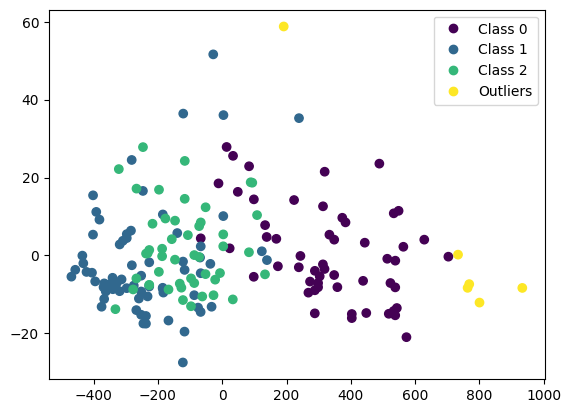

In [34]:
c = np.array(target)
c[true_indices_of_outliers] = 3

ax = plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=c)
plt.legend(handles=ax.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                   loc='best')

plt.show()

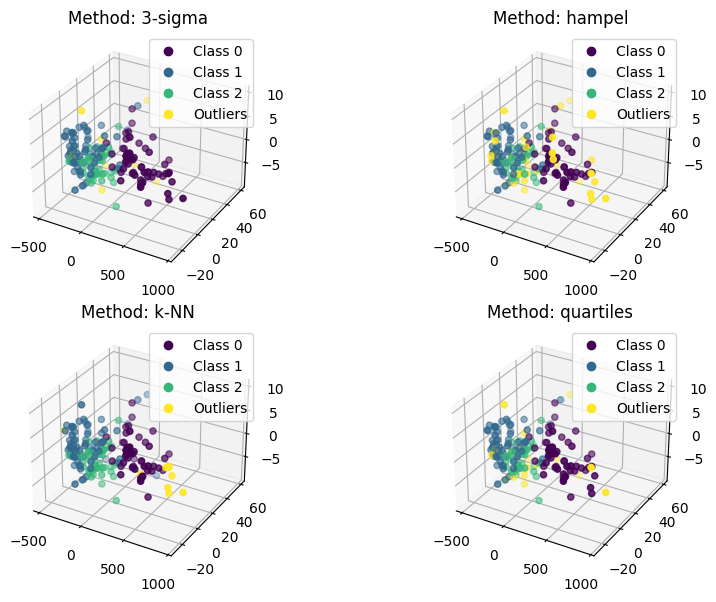

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7),
                       subplot_kw={'projection': '3d'})
axs = axs.ravel()

for ind, outlier in enumerate(outliers):
    c = np.array(target)
    c[outlier] = 3
    axs[ind].scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=c)
    axs[ind].set_title(f"Method: {method[ind]}")
    axs[ind].legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                   loc='best')
    
plt.show()

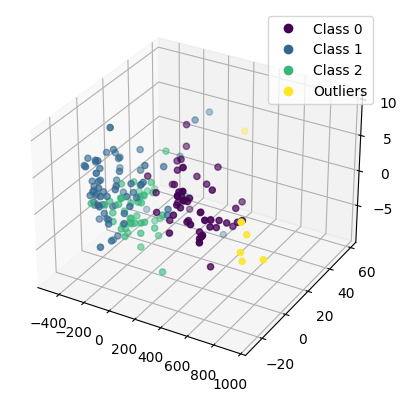

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c = np.array(target)
c[true_indices_of_outliers] = 3

ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                   loc='best')
plt.show()

# t-SNE

In [37]:
tsne_2d = TSNE(n_components=2)
data_tsne_2d = tsne_2d.fit_transform(data)

tsne_3d = TSNE(n_components=3)
data_tsne_3d = tsne_3d.fit_transform(data)

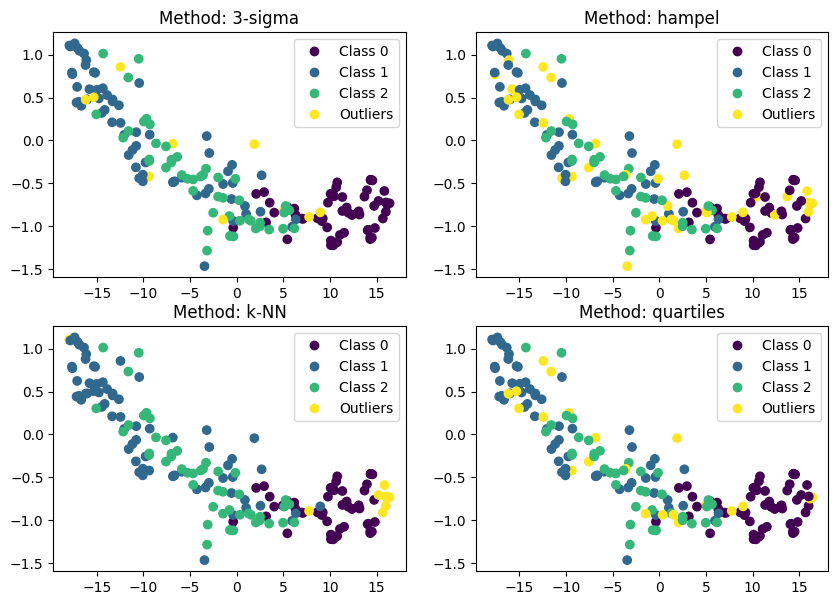

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7),)
axs = axs.ravel()

for ind, outlier in enumerate(outliers):
    c = np.array(target)
    c[outlier] = 3
    axs[ind].scatter(data_tsne_2d[:, 0], data_tsne_2d[:, 1], c=c)
    axs[ind].set_title(f"Method: {method[ind]}")
    axs[ind].legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                    loc='best')

plt.show()

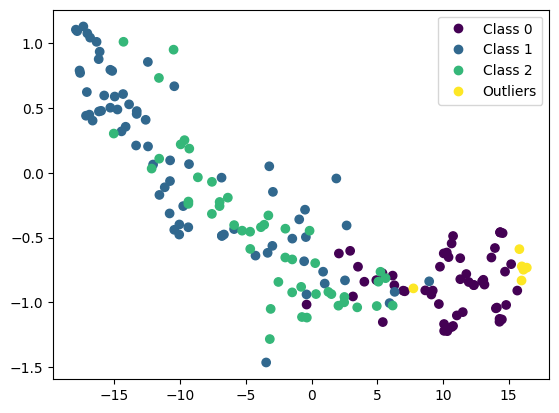

In [39]:
c = np.array(target)
c[true_indices_of_outliers] = 3

ax = plt.scatter(data_tsne_2d[:, 0], data_tsne_2d[:, 1], c=c)
plt.legend(handles=ax.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                   loc='best')

plt.show()

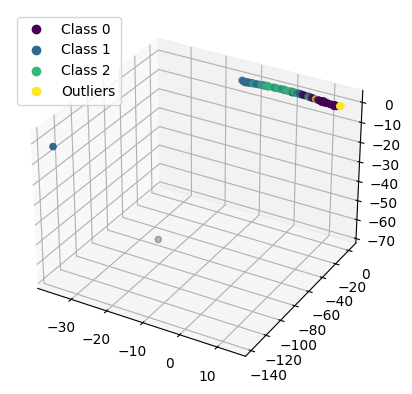

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c = np.array(target)
c[true_indices_of_outliers] = 3

ax.scatter(data_tsne_3d[:, 0], data_tsne_3d[:, 1], data_tsne_3d[:, 2], c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                   loc='best')
plt.show()

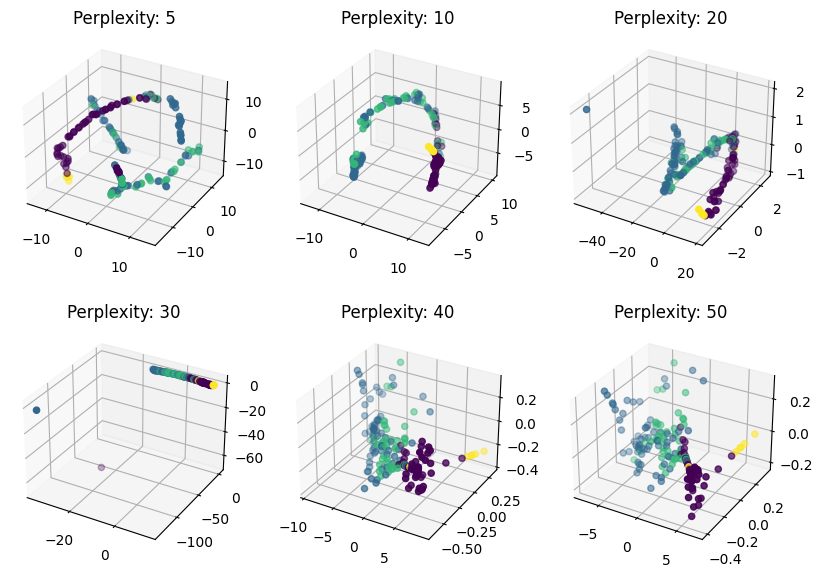

In [41]:
#source chatGPT
perplexities = [5, 10, 20, 30, 40, 50]

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 7),
                       subplot_kw={'projection': '3d'})
axs = axs.ravel()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=3, perplexity=perplexity)
    tsne_result = tsne.fit_transform(data)
    
    axs[i].scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=c)
    axs[i].set_title(f"Perplexity: {perplexity}")
    
plt.show()

In [42]:
tsne_3d_resolved = TSNE(n_components=3, perplexity=40)
data_tsne_3d_resolved = tsne_3d_resolved.fit_transform(data)

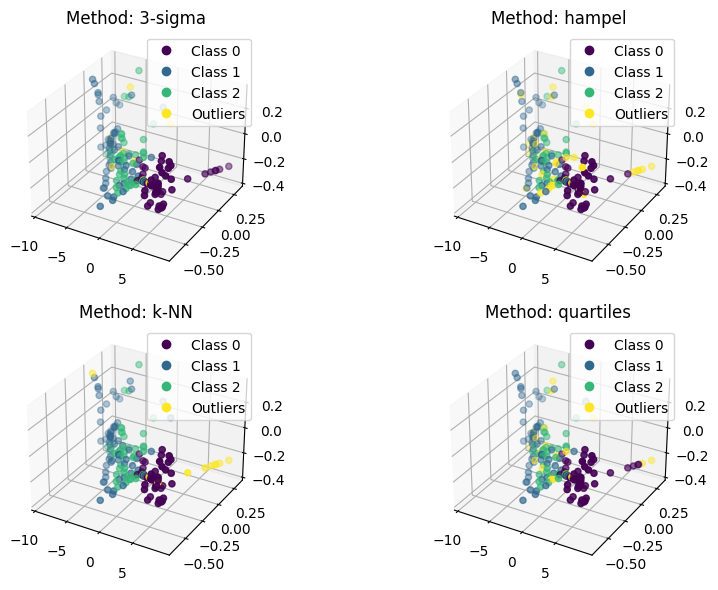

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7),
                       subplot_kw={'projection': '3d'})
axs = axs.ravel()

for ind, outlier in enumerate(outliers):
    c = np.array(target)
    c[outlier] = 3
    axs[ind].scatter(data_tsne_3d_resolved[:, 0], data_tsne_3d_resolved[:, 1], data_tsne_3d_resolved[:, 2], c=c)
    axs[ind].set_title(f"Method: {method[ind]}")
    axs[ind].legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                    loc='best')
    
plt.show()

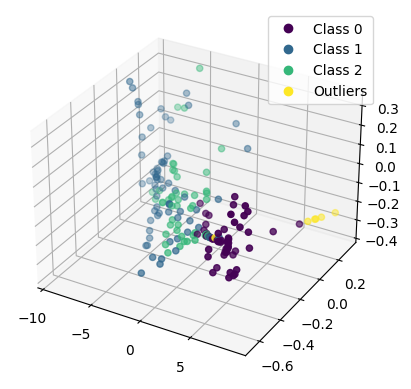

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c = np.array(target)
c[true_indices_of_outliers] = 3

ax.scatter(data_tsne_3d_resolved[:, 0], data_tsne_3d_resolved[:, 1], data_tsne_3d_resolved[:, 2], c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Outliers'],
                   loc='best')
plt.show()

# CLUSTERING

## KMeans

#### GRID SEARCH

In [45]:
best = [0, -1.]
for x in range(1,11):
    kmeans = KMeans(n_clusters=x, n_init=10)
    kmeans.fit_predict(data)
    result = rand_score(target, kmeans.labels_)
    if best[1] < result:
        best[0] = x
        best[1] = result
best

[3, 0.718656763791024]

In [46]:
best_pca_2d = [0,-1.]
best_pca_3d = [0,-1.]
best_tsne_2d = [0,-1.]
best_tsne_3d = [0,-1.]
bests = [best_pca_2d, best_pca_3d, best_tsne_2d, best_tsne_3d]

for ind, d in enumerate([data_pca_2d, data_pca_3d, data_tsne_2d, data_tsne_3d_resolved]):
    for cluster in range(1,11):
        kmeans = KMeans(n_clusters=cluster, n_init=10)
        kmeans.fit_predict(d)
        data_pred = kmeans.labels_
        result = rand_score(target, data_pred)
        if bests[ind][1] < result:
            bests[ind] = [cluster, result]
print(bests)       

[[3, 0.718656763791024], [3, 0.718656763791024], [4, 0.7450009521995811], [4, 0.7450009521995811]]


### PCA2D 

In [47]:
kmeans_pca = KMeans(n_clusters=3, n_init=10)
kmeans_pca.fit_predict(data_pca_2d)
data_pred_pca_2d = kmeans_pca.labels_

In [48]:
rand_score(target, data_pred_pca_2d)

0.718656763791024

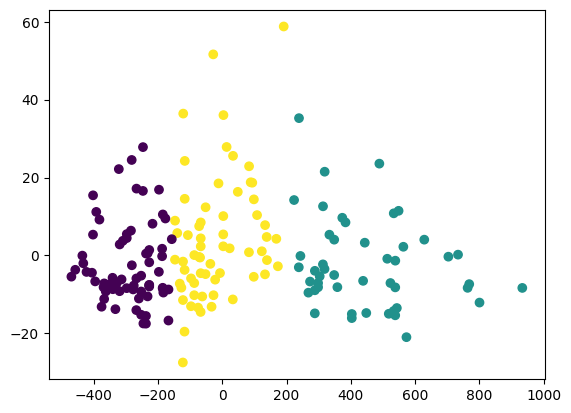

In [49]:
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=data_pred_pca_2d)
plt.show()

### PCA3D 

In [50]:
kmeans_pca.fit_predict(data_pca_3d)
data_pred_pca_3d = kmeans_pca.labels_

In [51]:
rand_score(target, data_pred_pca_3d)

0.718656763791024

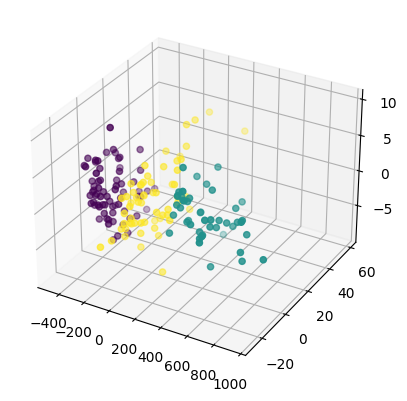

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=data_pred_pca_3d)
plt.show()

### t-SNE2D 

In [53]:
kmeans_tsne = KMeans(n_clusters=4, n_init=10)
kmeans_tsne.fit_predict(data_tsne_2d)
data_pred_tsne_2d = kmeans_tsne.labels_

In [54]:
rand_score(target, data_pred_tsne_2d)

0.7450009521995811

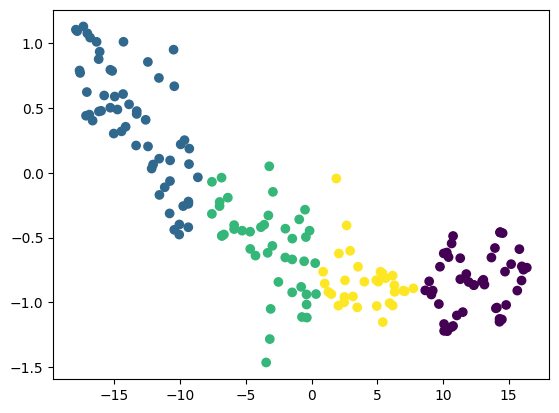

In [55]:
plt.scatter(data_tsne_2d[:, 0], data_tsne_2d[:, 1], c=data_pred_tsne_2d)
plt.show()

### t-SNE3D 

In [56]:
kmeans_tsne.fit_predict(data_tsne_3d_resolved)
data_pred_tsne_3d = kmeans_tsne.labels_

In [57]:
rand_score(target, data_pred_tsne_3d)

0.7450009521995811

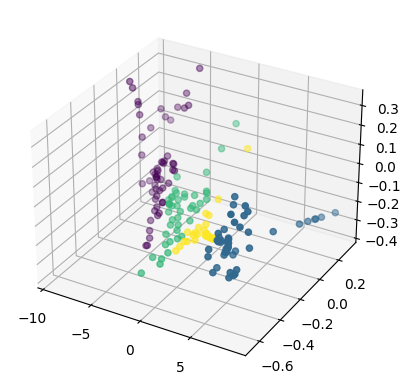

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne_3d_resolved[:, 0], data_tsne_3d_resolved[:, 1], data_tsne_3d_resolved[:, 2], c=data_pred_tsne_3d)
plt.show()

## Agglomerative

In [59]:
#source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [60]:
for_metric_bests = [[0, -1.],[0, -1.],[0, -1.]]
for i,metric in enumerate(["euclidean","manhattan", "cosine"]):
    for clust in range(1, 16):
        aggClustering = AgglomerativeClustering(n_clusters=clust, linkage="average", metric=metric,compute_distances=True)
        aggClustering.fit(data)
        result = rand_score(target,aggClustering.labels_)
        if result > for_metric_bests[i][1]:
            for_metric_bests[i] = [clust, result]
for_metric_bests

[[4, 0.7093886878689774], [6, 0.6972640132038342], [11, 0.7209420427855012]]

euclidean rand index: 0.7093886878689774
clusters =  4
manhattan rand index: 0.6972640132038342
clusters =  6
cosine rand index: 0.7209420427855012
clusters =  11


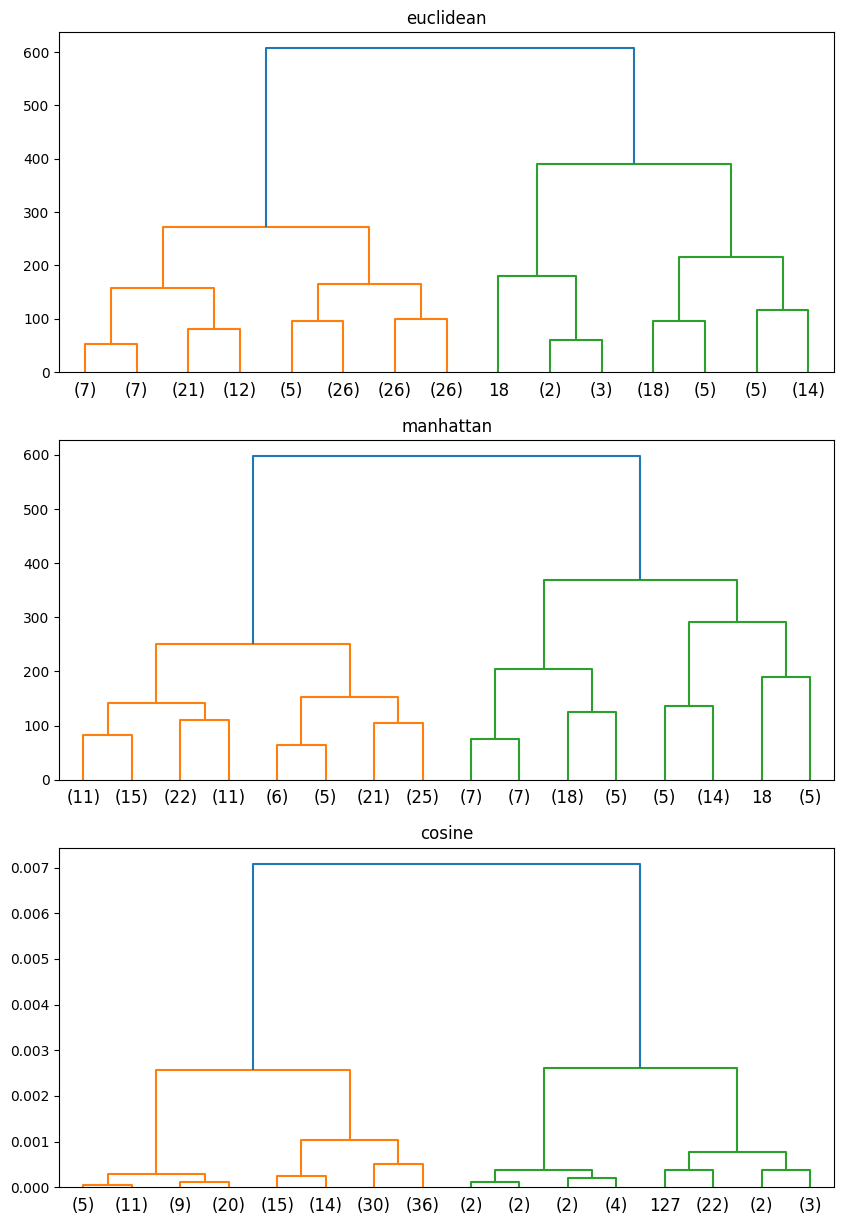

In [61]:
fig, ax = plt.subplots(3, 1,figsize=(10,15))

for i,metric in enumerate(["euclidean","manhattan", "cosine"]):
    
    aggClustering = AgglomerativeClustering(n_clusters=for_metric_bests[i][0], linkage="average", metric=metric,compute_distances=True)
    aggClustering.fit(data)
    
    plot_dendrogram(aggClustering, truncate_mode="level", p=3, ax=ax[i])
    ax[i].set_title(metric)
    
    print(metric + " rand index:", rand_score(target,aggClustering.labels_))
    print("clusters = ", for_metric_bests[i][0])

##  DBSCAN (just for fun :D)

In [62]:
def my_grid_search(reduced_data, metric):

    eps = [i*.1 for i in range(1,10)]
    min_samp = [i for i in range(1,10)]


    for_metric_bests_dbscan = [0, 0, 0, -1.]

    for k, samp in enumerate(min_samp):
        for m, ep in enumerate(eps):
            
            scaler = StandardScaler()
            scaler_result = scaler.fit_transform(reduced_data) 
                
            dbscan = DBSCAN(eps=ep, min_samples=samp, metric=metric)

            dbscan.fit(scaler_result)

            labels = dbscan.labels_
            
            clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            result = rand_score(target, labels)
            
            if result > for_metric_bests_dbscan[3]:
                for_metric_bests_dbscan = [samp, ep, clusters, result]
    return for_metric_bests_dbscan[0], for_metric_bests_dbscan[1], for_metric_bests_dbscan[2]

PCA_2D euclidean rand index: 0.6699041452421761
t-SNE_2D euclidean rand index: 0.6698406652701073
PCA_2D manhattan rand index: 0.6710467847394147
t-SNE_2D manhattan rand index: 0.6799339808290484
PCA_2D cosine rand index: 0.3379673712943566
t-SNE_2D cosine rand index: 0.6428616771408621


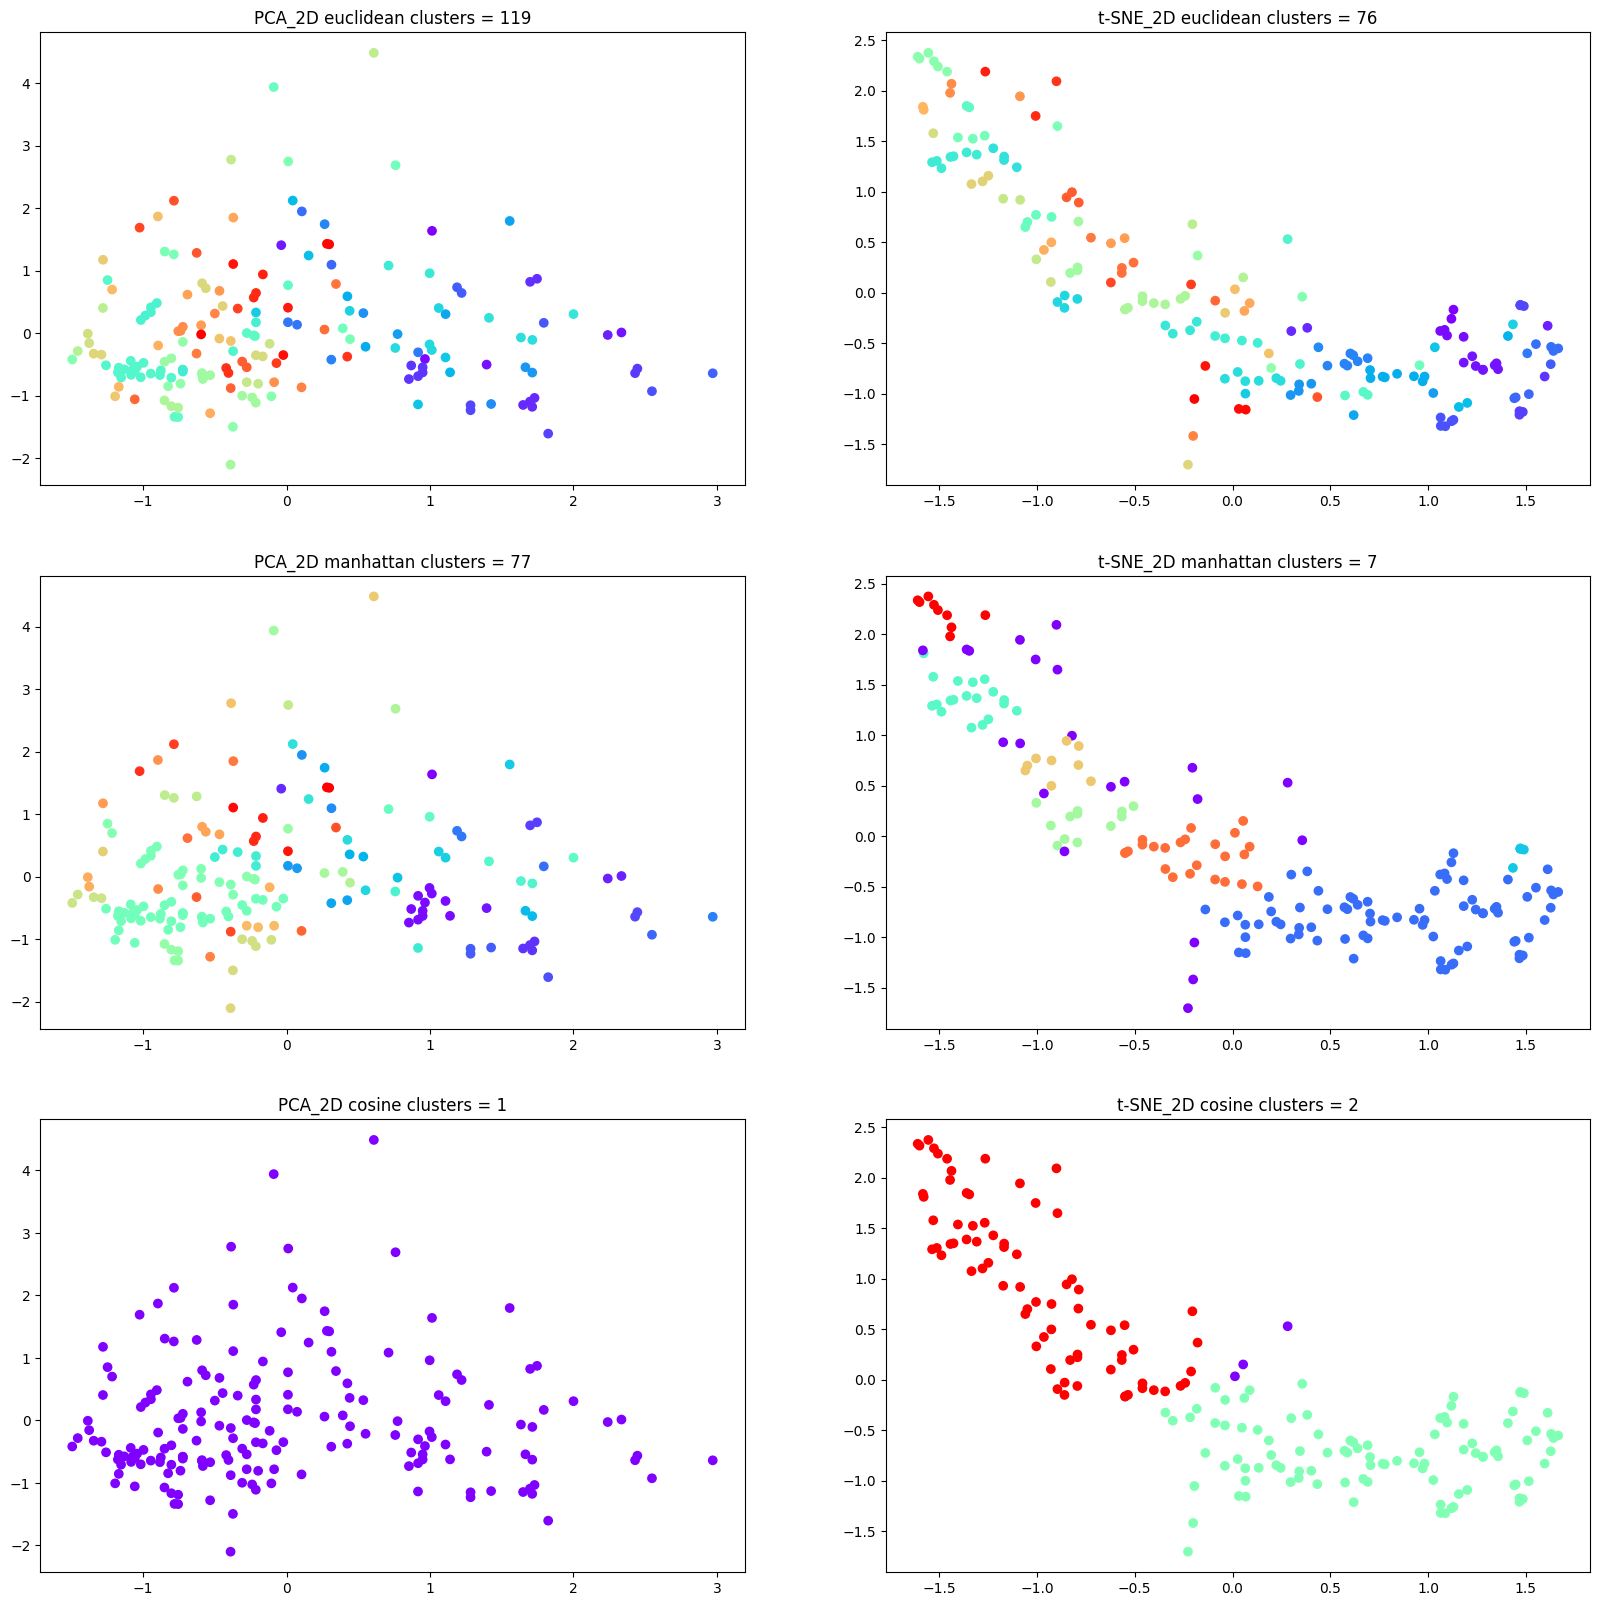

In [63]:
reduced_data_2d = [data_pca_2d, data_tsne_2d]
name_of_sets_2d = ['PCA_2D', 't-SNE_2D']

fig, axs = plt.subplots(3, 2, figsize=(20, 20),)
axs = axs.ravel()
k = 0

for i, metric in enumerate(["euclidean","manhattan", "cosine"]):
    for ind, val in enumerate(reduced_data_2d):
        
        scaler = StandardScaler()
        scaler_result = scaler.fit_transform(val)
        
        samp, eps, clusters = my_grid_search(val, metric)
        
        dbscan = DBSCAN(eps=eps, min_samples=samp, metric=metric)

        dbscan.fit(scaler_result)

        labels = dbscan.labels_
        
        
        axs[k].scatter(scaler_result[:, 0], scaler_result[:, 1], c=labels, cmap='rainbow')
        axs[k].set_title(name_of_sets_2d[ind] + " " + metric + " clusters = " + str(clusters))
        print(name_of_sets_2d[ind] + " " + metric + " rand index:", rand_score(target,labels))
        k += 1
plt.show()


# Spliting data

In [64]:
data_with_target = pd.concat([data, target], axis=1)
shuffled_data = data_with_target.sample(frac=1,random_state=10).reset_index(drop=True)
shuffled_data

,feat. 1,feat. 2,feat. 3,feat. 4,feat. 5,feat. 6,feat. 7,feat. 8,feat. 9,feat. 10,feat. 11,feat. 12,feat. 13,target
0,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1
1,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
2,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0
3,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
4,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
174,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0,1
175,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0
176,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1


In [65]:
x = shuffled_data.copy()
del x['target']
y = shuffled_data['target']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

# Classification

0.9722222222222222

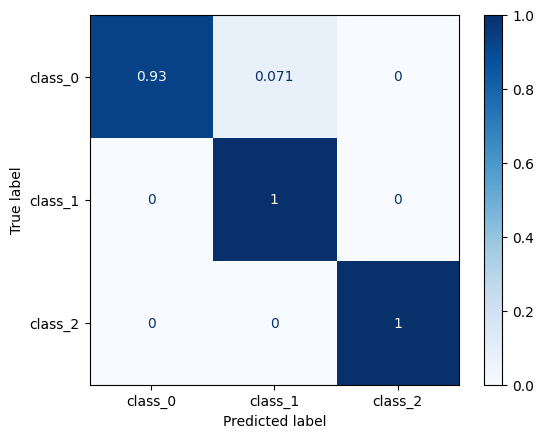

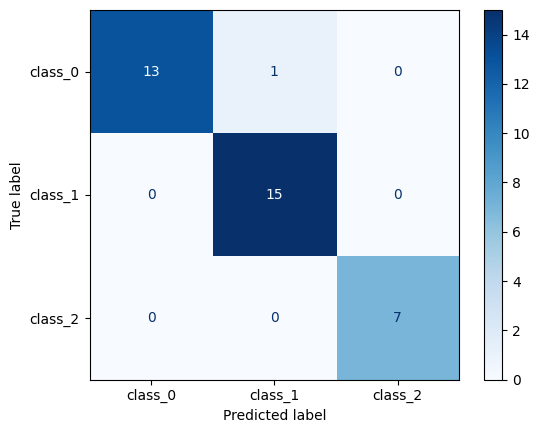

In [67]:
nb = GaussianNB()

nb.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, cmap=plt.cm.Blues,
                              display_labels=['class_0', 'class_1', 'class_2'], normalize='true')

ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, cmap=plt.cm.Blues,
                              display_labels=['class_0', 'class_1', 'class_2'])

y_pred = nb.predict(X_test)

accuracy_score(y_test, y_pred)

In [68]:
fold = KFold(n_splits=5)

d = {}
bests_knn = []
for metric in ["euclidean","manhattan","cosine"]:
    for neighbors in range (1,10):
    
        accuracy = 0
        
        for i, (train_index, test_index) in enumerate(fold.split(data)):
            
            knn = KNeighborsClassifier(n_neighbors=neighbors,metric=metric)
            knn.fit(x.iloc[train_index],y.iloc[train_index])
            accuracy += knn.score(x.iloc[test_index],y.iloc[test_index])
            
        accuracy /= 5
        
        if metric in d.keys():
            d[metric].append(accuracy)
        else:
            d[metric] = [accuracy]

knn_results = pd.DataFrame(data=d)


In [69]:
knn_results.mean()

euclidean    0.708148
manhattan    0.758642
cosine       0.814127
dtype: float64

In [70]:
tree = DecisionTreeClassifier(criterion='gini', random_state=10)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9444444444444444

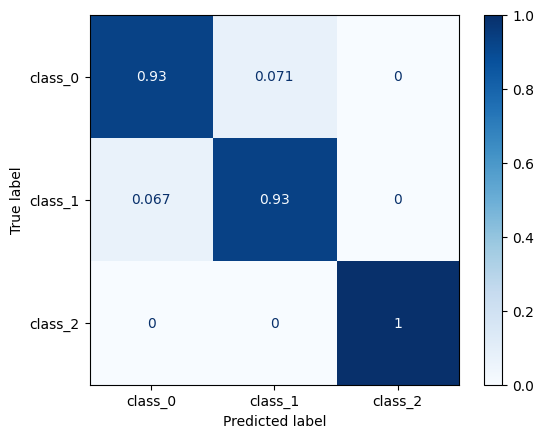

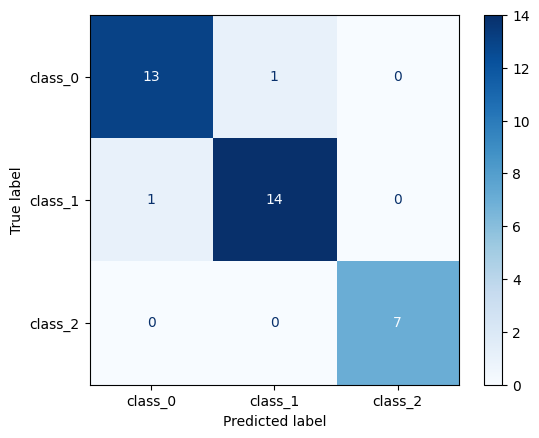

In [71]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap=plt.cm.Blues,
                              display_labels=['class_0', 'class_1', 'class_2'], normalize='true')

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap=plt.cm.Blues,
                              display_labels=['class_0', 'class_1', 'class_2'])

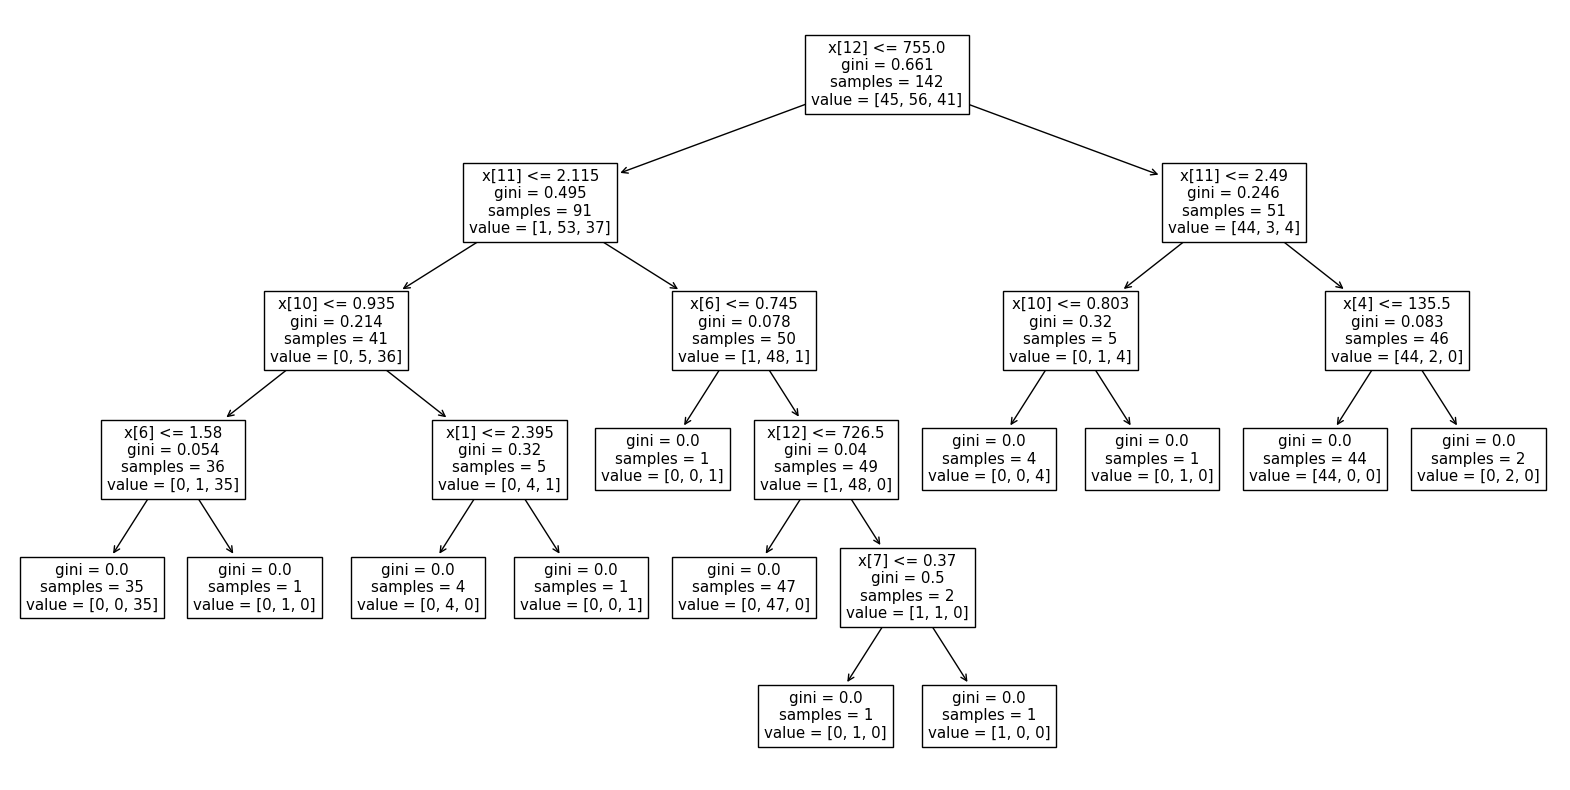

In [72]:
fig, ax = plt.subplots(figsize=(20,10))
plot_tree(tree, ax=ax)
plt.show()